## Unsupervised Learning

### Principal Components

We will use the `USArrests` data

In [1]:
dimnames(USArrests)
apply(USArrests, 2, mean)
apply(USArrests, 2, var)

[[1]]
 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       

[[2]]
[1] "Murder"   "Assault"  "UrbanPop" "Rape"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

We see that `Assault` has a much larger variance than the other variables. It would dominate the principal components, wo we choose to standardize the variables when we perform PCA.

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

[1] "sdev"     "rotation" "center"   "scale"    "x"

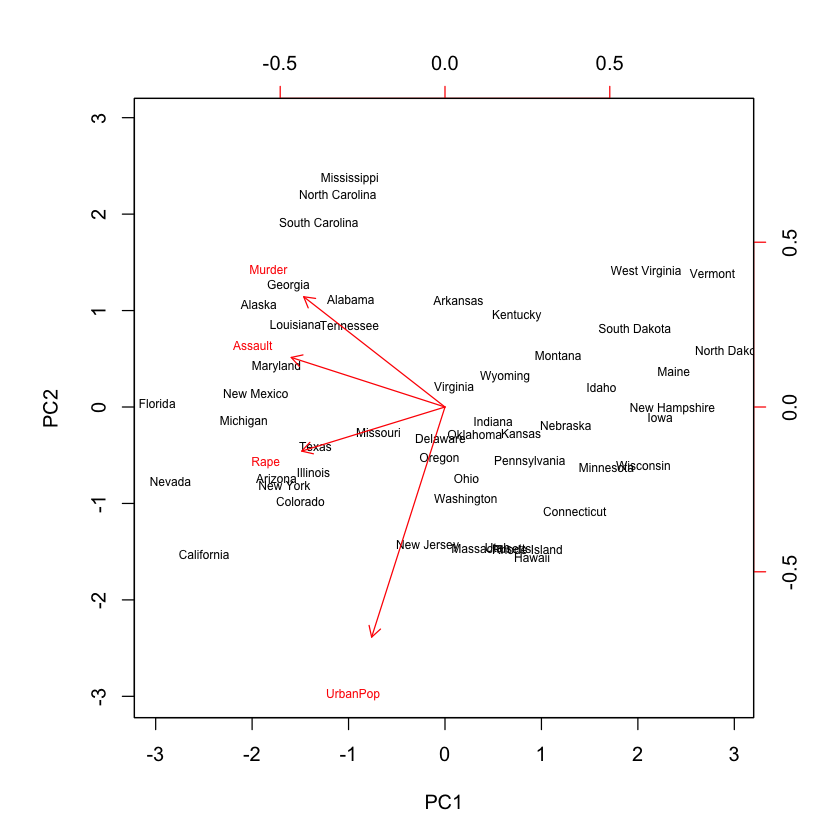

In [3]:
pca.out=prcomp(USArrests, scale = TRUE)
pca.out
names(pca.out)
biplot(pca.out, scale=0, cex=.6)

### K-means Clustering

K-means works in any dimension, but is most fun to demonstrate in two, because we can plot pictures.

Lets make some data with cluters. We do this by shifting the means of the points around.

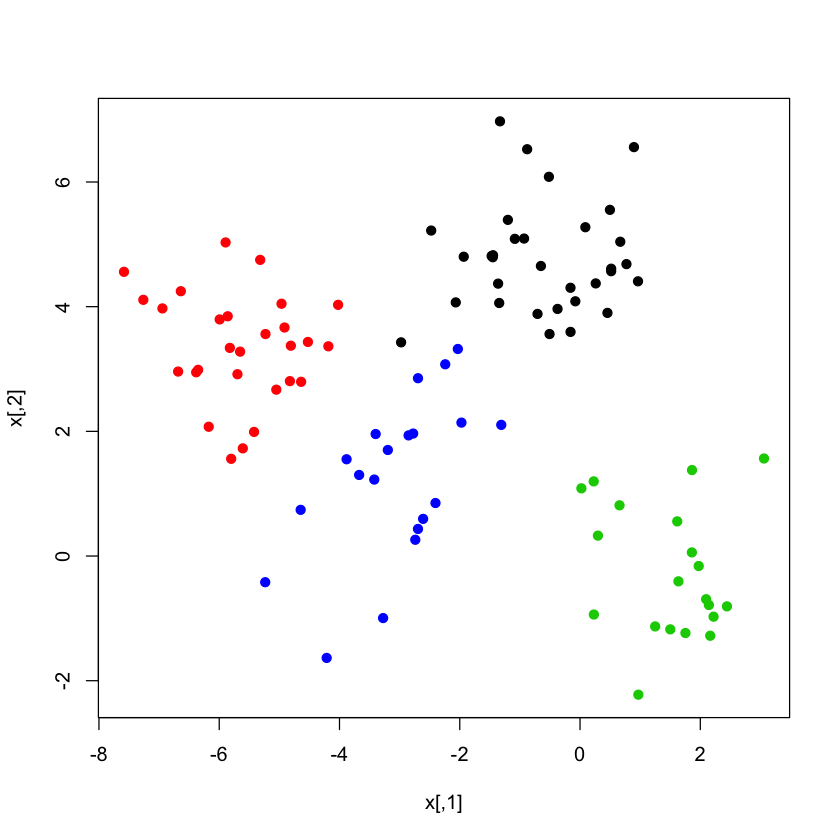

In [4]:
set.seed(101)
x=matrix(rnorm(100*2), 100, 2)
xmean=matrix(rnorm(8, sd=4), 4, 2)
which=sample(1:4, 100, replace=TRUE)
x=x+xmean[which,]
plot(x, col=which, pch=19)

We know the 'true' cluster IDs, bit we wont tell that to the `kmeans` algorithm.

K-means clustering with 4 clusters of sizes 20, 20, 28, 32

Cluster means:
        [,1]       [,2]
1  1.4989983 -0.2412154
2 -3.1104142  1.2535711
3 -5.6518323  3.3513316
4 -0.5787702  4.7639233

Clustering vector:
  [1] 3 2 4 3 2 4 3 2 4 4 1 4 4 1 2 1 3 1 3 3 3 3 3 1 4 4 2 3 2 4 3 1 3 2 2 1 1
 [38] 2 1 1 3 2 2 3 3 1 3 4 3 2 3 4 4 1 1 2 1 4 4 4 2 3 3 3 2 2 4 4 1 3 3 4 4 1
 [75] 4 1 3 4 4 4 2 4 2 4 3 1 4 3 3 4 4 2 3 2 4 4 1 1 4 4

Within cluster sum of squares by cluster:
[1] 34.95921 48.52107 42.40322 53.04203
 (between_SS / total_SS =  85.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

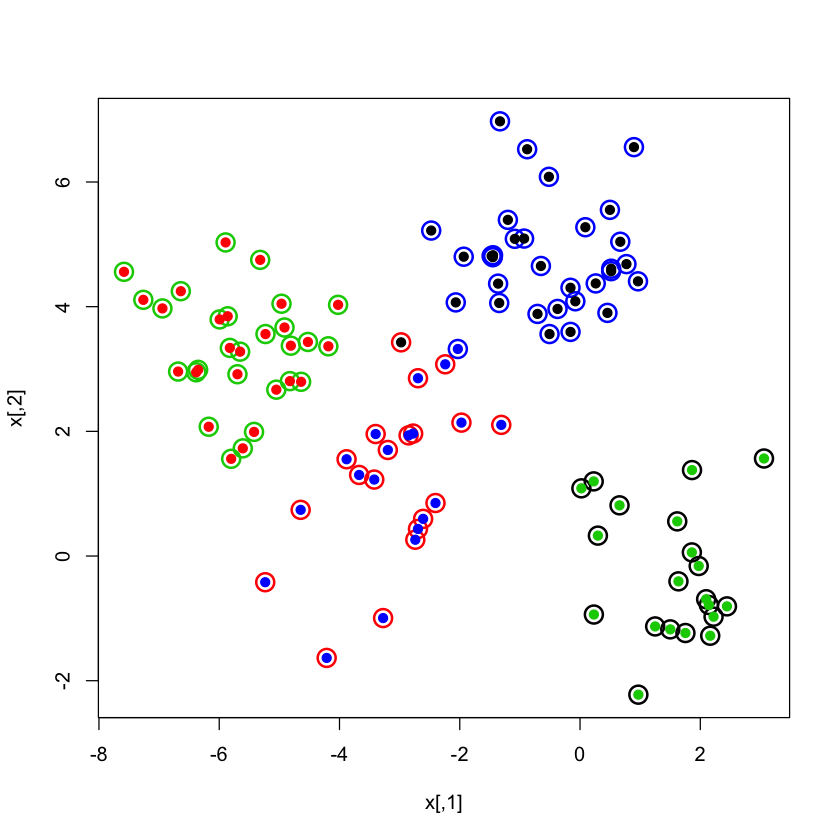

In [25]:
km.out=kmeans(x, 4, nstart=15)
km.out
plot(x, col=km.out$cluster, cex=2, pch=1, lwd=2)
points(x, col=which, pch=19)

### Hierarchical Clustering

We will use these same data and use hierarchical clustering

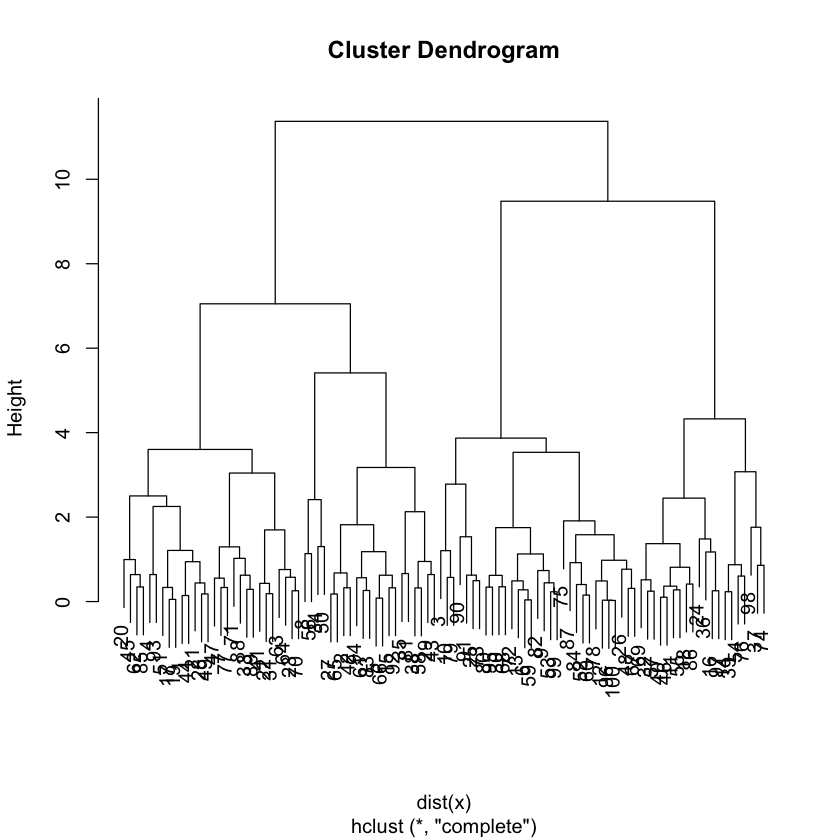

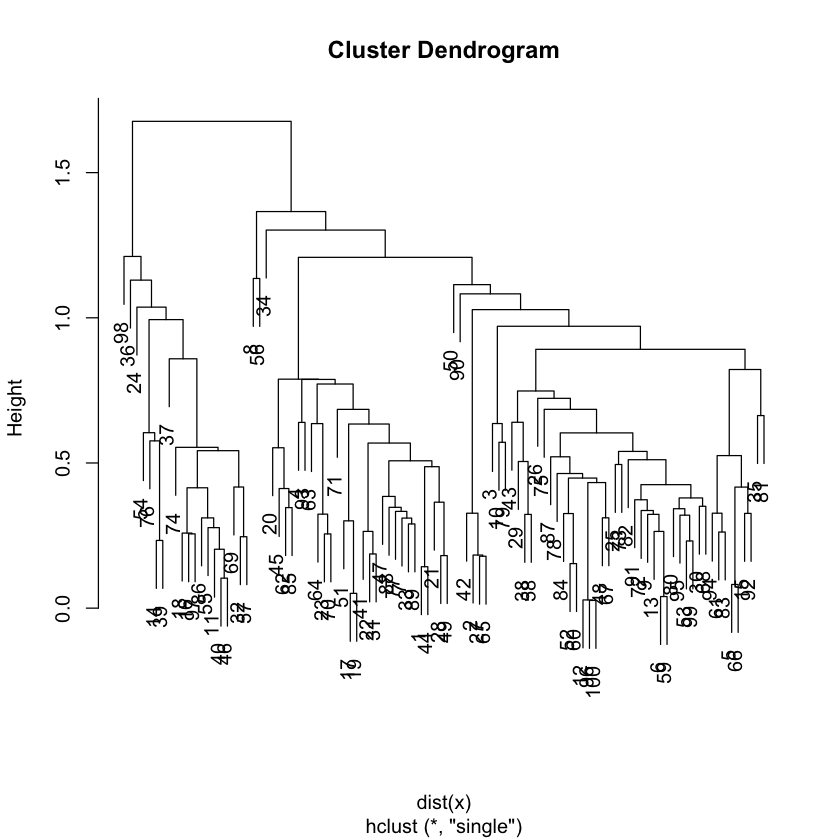

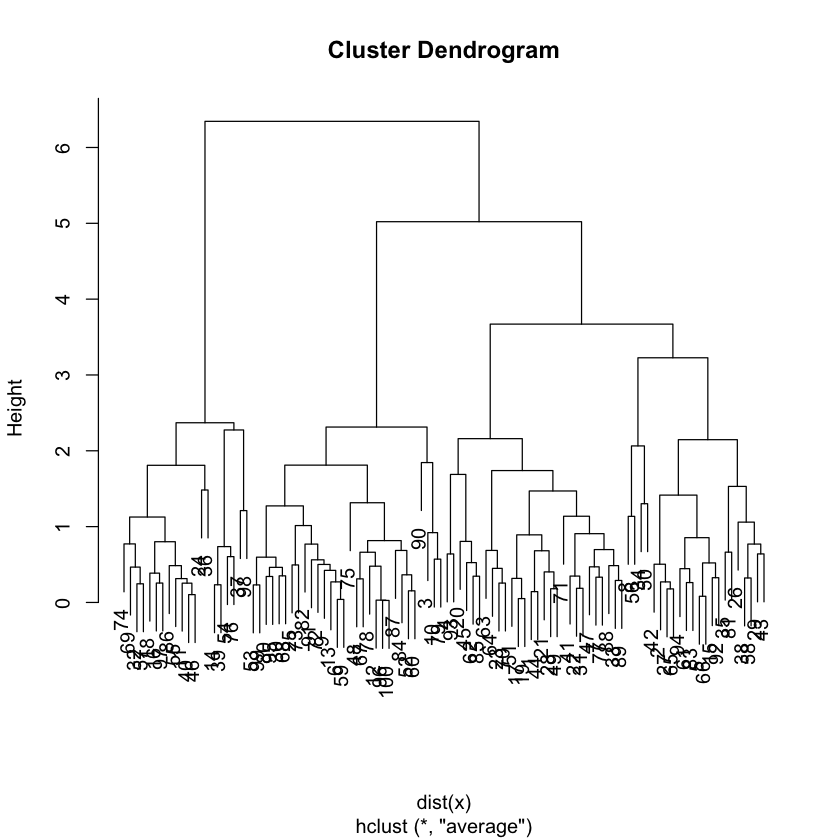

In [27]:
hc.complete=hclust(dist(x), method='complete')
plot(hc.complete)
hc.single=hclust(dist(x), method='single')
plot(hc.single)
hc.average=hclust(dist(x), method='average')
plot(hc.average)

Lets compare this with the actual clusters in the data. We will use the function `cutree` to cut the tree at level 4.

This will produce a vector of numbers form 1 to 4, saying which branch each observation is on. You will sometimes see pretty plots where the leaves of the dendrogram are colored. I searched a bit on the web for how to do this, and its a little too conplicated for this demonstration.

We can use `table` to see how well they match:

In [28]:
hc.cut=cutree(hc.complete, 4)
table(hc.cut, which)
table(hc.cut, km.out$cluster)

      which
hc.cut  1  2  3  4
     1  0 28  0  0
     2  1  0  0 20
     3 31  0  0  0
     4  0  0 20  0

      
hc.cut  1  2  3  4
     1  0  0 28  0
     2  0 20  0  1
     3  0  0  0 31
     4 20  0  0  0

Or we can use our group membership as labels for the leaves of the dendrogram:

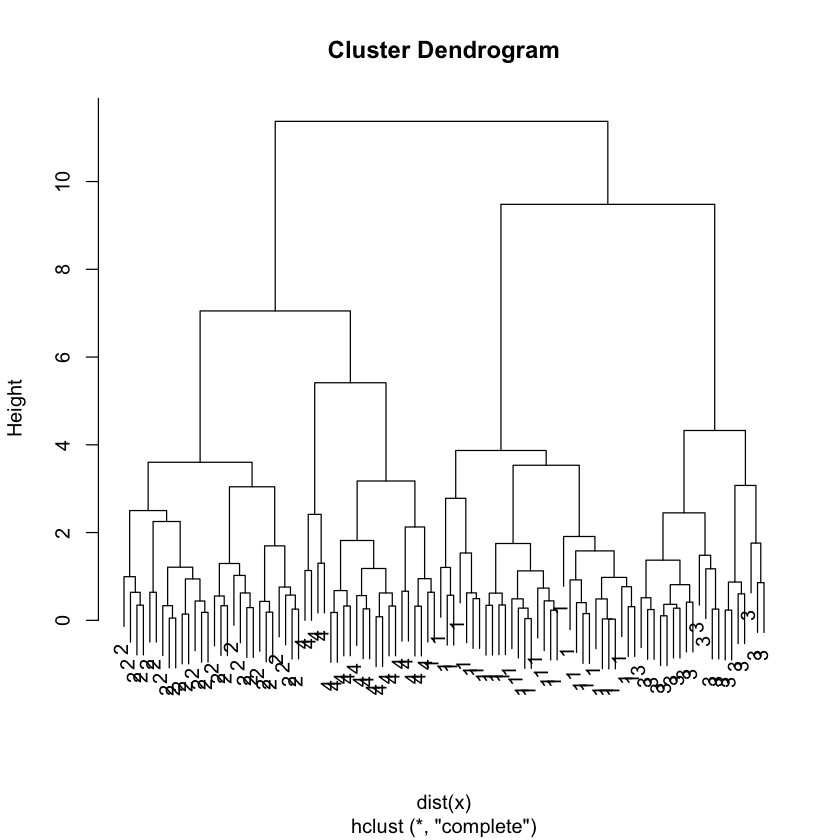

In [29]:
plot(hc.complete, labels = which)